<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/Hypertension_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df= pd.read_csv("/content/hypertension_dataset.csv")

In [66]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [67]:
df.isnull().sum()

,0
Age,0
Salt_Intake,0
Stress_Score,0
BP_History,0
Sleep_Duration,0
BMI,0
Medication,799
Family_History,0
Exercise_Level,0
Smoking_Status,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [69]:
df=df.drop("Medication", axis=1)

In [70]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


In [71]:
sns.set_style("whitegrid")

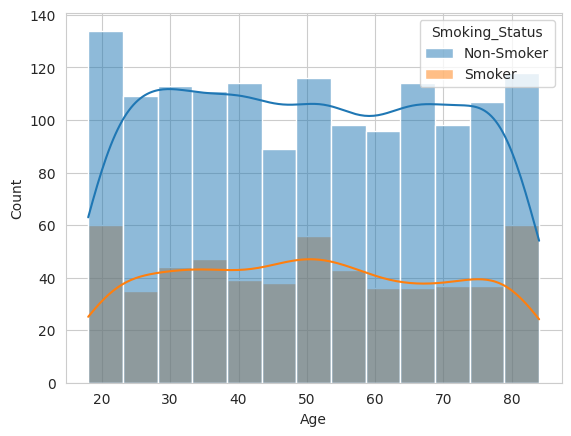

In [72]:
sns.histplot(data=df, x="Age", kde=True, color="red", hue="Smoking_Status")
plt.show()

/tmp/ipython-input-73-2582704467.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data= df, x="BP_History", y="BMI", color="red", hue="Smoking_Status")


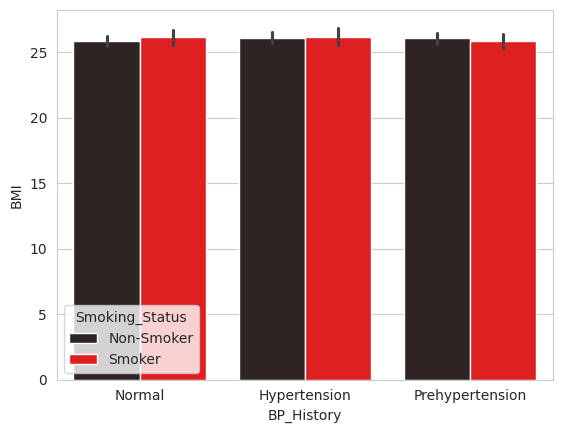

In [73]:
sns.barplot(data= df, x="BP_History", y="BMI", color="red", hue="Smoking_Status")
plt.show()

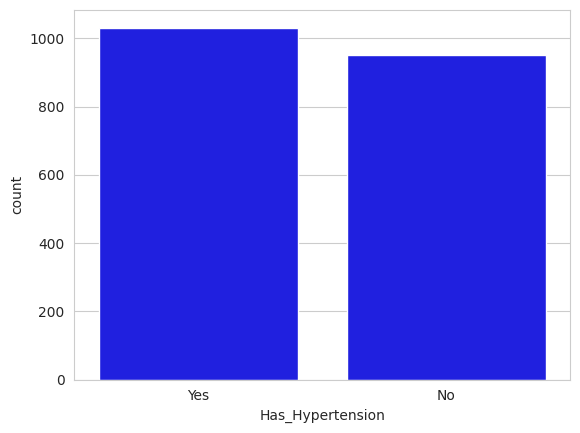

In [74]:
sns.countplot(data=df, x="Has_Hypertension", color="blue")
plt.show()

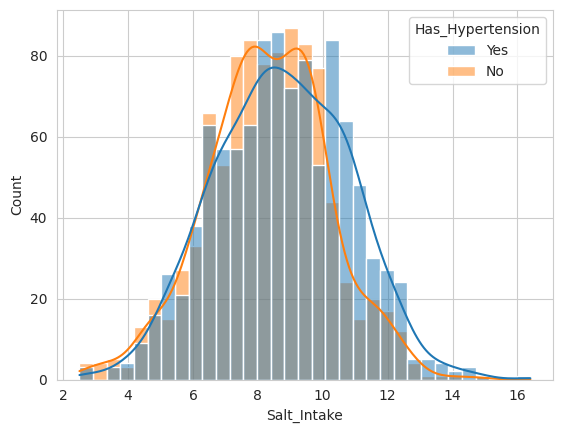

In [75]:
sns.histplot(data=df, x="Salt_Intake", kde=True, color="purple", hue="Has_Hypertension")
plt.show()

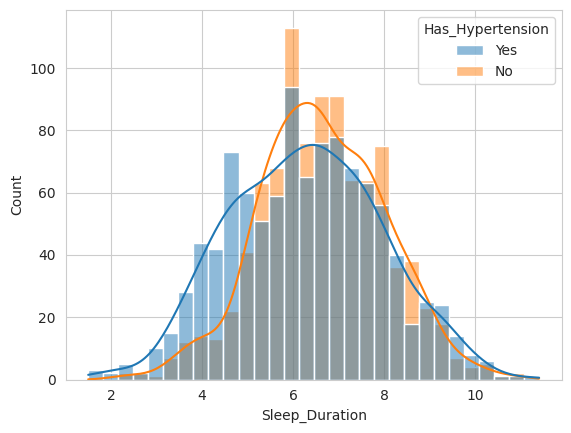

In [76]:
sns.histplot(data=df, x="Sleep_Duration", kde=True, color="green", hue="Has_Hypertension")
plt.show()

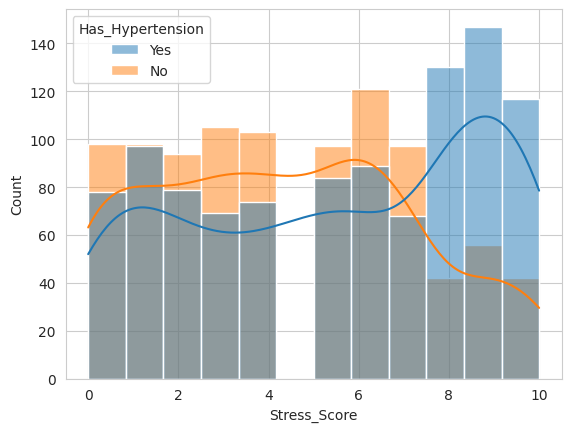

In [77]:
sns.histplot(data=df, x="Stress_Score", kde=True, color="orange", hue="Has_Hypertension")
plt.show()

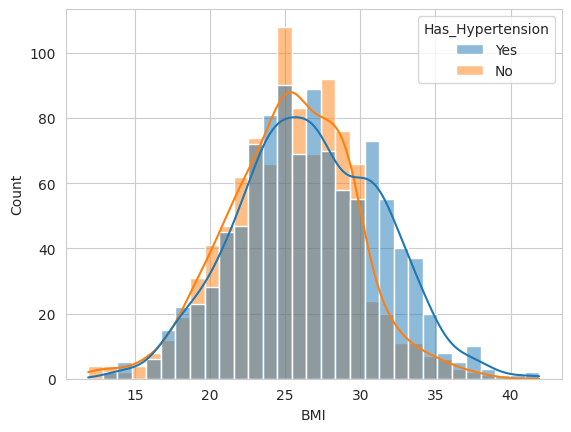

In [78]:
sns.histplot(data=df, x="BMI", kde=True, color="brown", hue="Has_Hypertension")
plt.show()

In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
le= LabelEncoder()
for col in ["Has_Hypertension","Smoking_Status","BP_History","Family_History","Exercise_Level"]:
  df[col]=le.fit_transform(df[col])

In [81]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,1,6.4,25.8,1,1,0,1
1,32,11.7,10,1,5.4,23.4,0,1,0,0
2,78,9.5,3,1,7.1,18.7,0,2,0,0
3,38,10.0,10,0,4.2,22.1,0,1,0,1
4,41,9.8,1,2,5.8,16.2,0,2,0,0


In [82]:
X= df.drop("Has_Hypertension", axis=1)
y= df["Has_Hypertension"]

In [83]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)


In [84]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
accuracy= accuracy_score(y_test, lr_pred)
accuracy

0.8085642317380353

In [86]:
cm= confusion_matrix(y_test, lr_pred)

In [87]:
cm

array([[157,  35],
       [ 41, 164]])

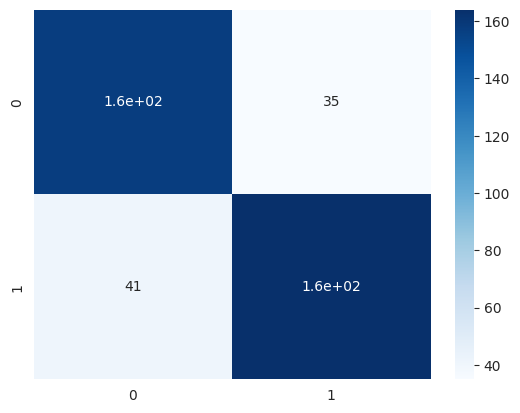

In [88]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

In [89]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred= dt.predict(X_test)

In [90]:
ac=accuracy_score(y_test, dt_pred)

In [91]:
ac

0.9596977329974811

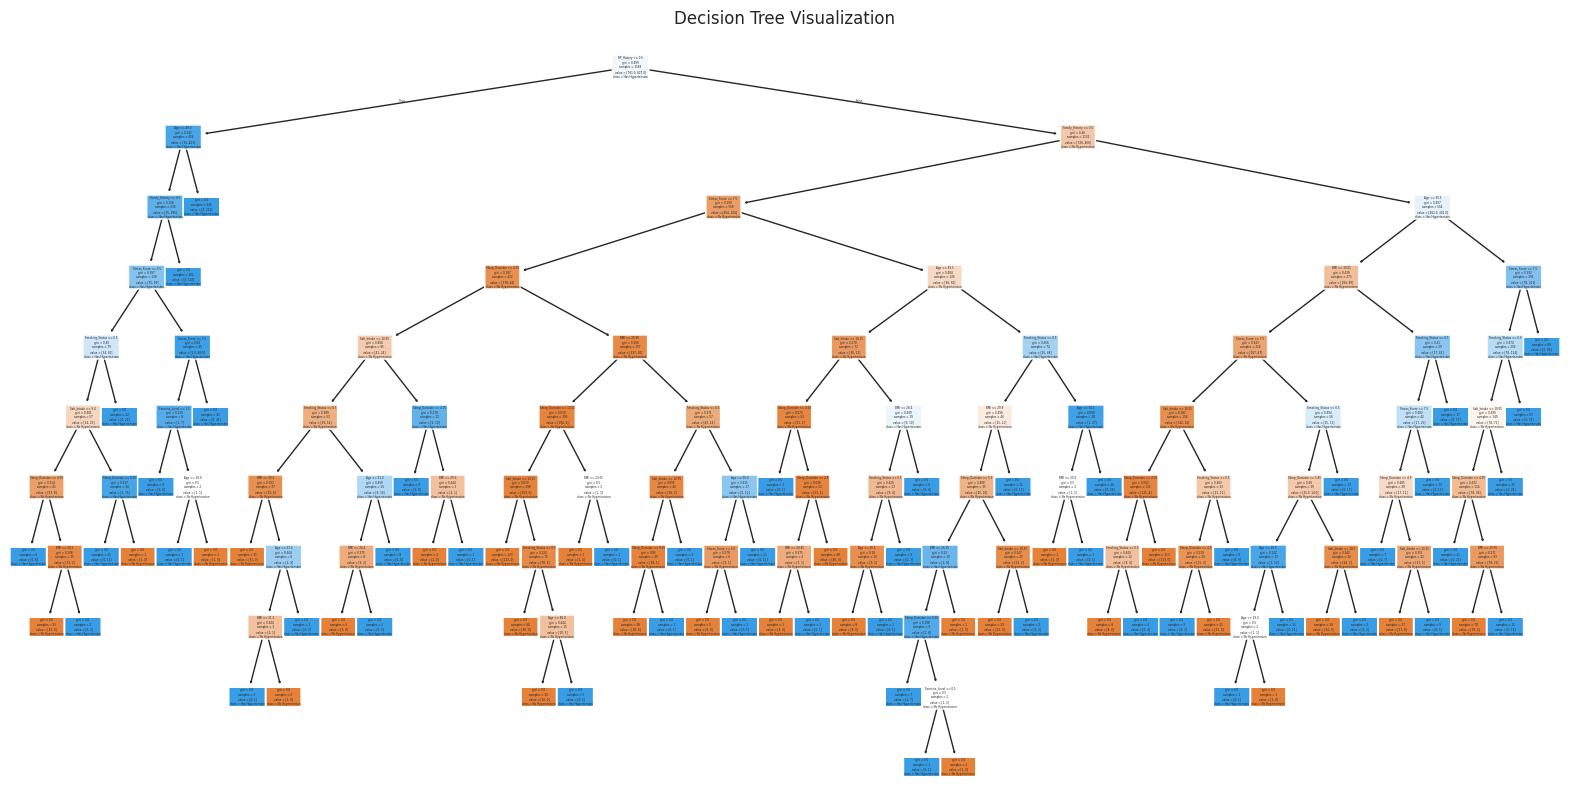

In [92]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Hypertension', 'Has Hypertension'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

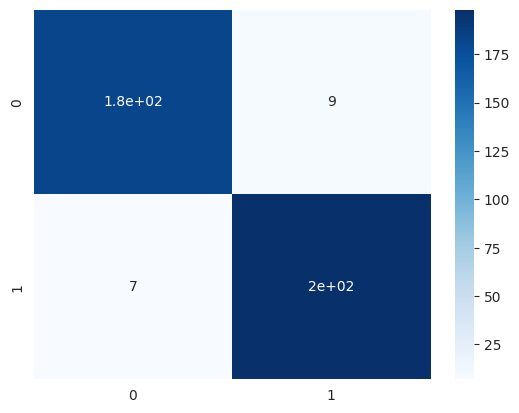

In [93]:
cm_dt= confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, cmap="Blues")
plt.show()

In [121]:
param= {"max_depth": [15,10,12,20]}
from sklearn.model_selection import GridSearchCV

In [122]:
gs= GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=5)


In [123]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [15, 10, 12, 20]})

In [124]:
y_grid=gs.predict(X_test)

In [125]:
ac_grid= accuracy_score(y_test, y_grid)

In [126]:
ac_grid

0.9596977329974811

Text(0, 0.5, 'Accuracy')

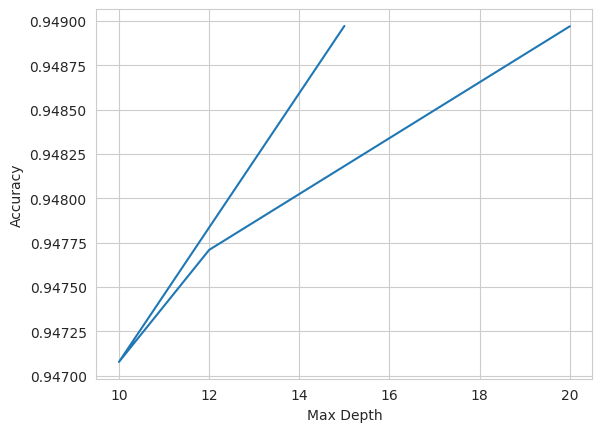

In [127]:
plt.plot(gs.cv_results_["param_max_depth"], gs.cv_results_["mean_test_score"])
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")